In [1]:
from feos.si import *
from feos.pcsaft import *
from feos.pcsaft.eos import *

import matplotlib.pyplot as plt

## Ideal mixture

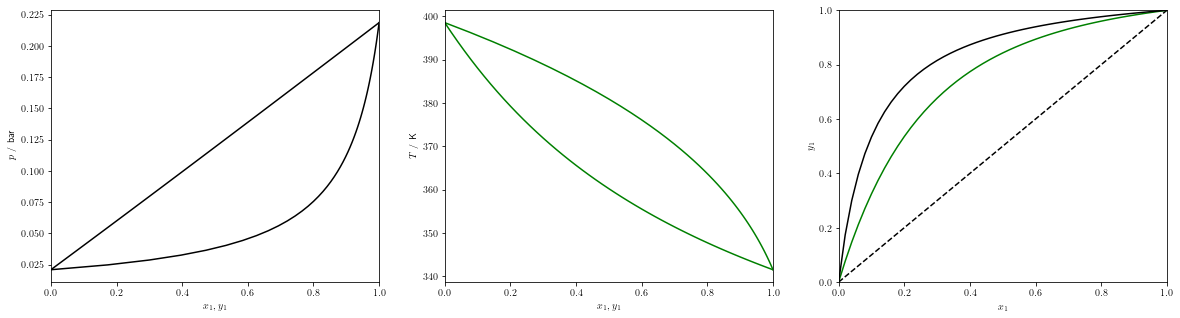

In [2]:
params = PcSaftParameters.from_json(['hexane', 'octane'], 'parameters.json')
saft = PcSaft(params)
dia_p = PhaseDiagramBinary.new_pxy(saft, 300*KELVIN)
dia_t = PhaseDiagramBinary.new_txy(saft, BAR)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid_molefracs, dia_p.pressure/BAR, '-k')
ax[0].plot(dia_p.vapor_molefracs, dia_p.pressure/BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vapor_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid_molefracs, dia_t.vapor_molefracs, '-g')
ax[2].plot(dia_p.liquid_molefracs, dia_p.vapor_molefracs, '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

## Azeotropic mixture

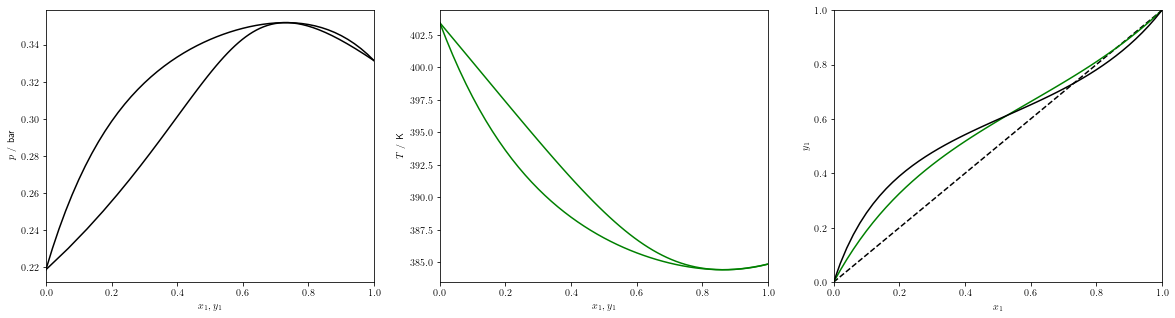

In [3]:
params = PcSaftParameters.from_json(['acetone', 'hexane'], 'parameters.json')
saft = PcSaft(params)
dia_p = PhaseDiagramBinary.new_pxy(saft, 300*KELVIN)
dia_t = PhaseDiagramBinary.new_txy(saft, 5*BAR)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid_molefracs, dia_p.pressure/BAR, '-k')
ax[0].plot(dia_p.vapor_molefracs, dia_p.pressure/BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vapor_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid_molefracs, dia_t.vapor_molefracs, '-g')
ax[2].plot(dia_p.liquid_molefracs, dia_p.vapor_molefracs, '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

## Supercritical mixture

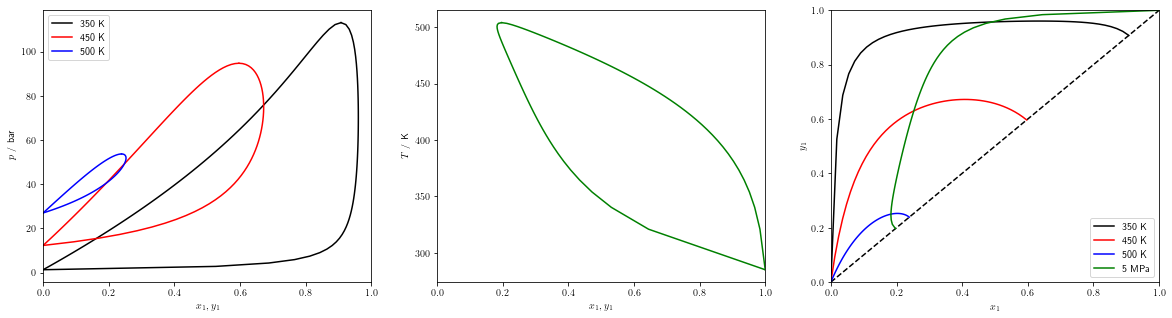

In [4]:
params = PcSaftParameters.from_json(['carbon dioxide', 'hexane'], 'parameters.json')
saft = PcSaft(params)
T_vec = [350*KELVIN, 450*KELVIN, 500*KELVIN]
c_vec = ['k', 'r', 'b']
dia_p = [PhaseDiagramBinary.new_pxy(saft, T) for T in T_vec]
dia_t = PhaseDiagramBinary.new_txy(saft, 50*BAR)

f, ax = plt.subplots(1,3,figsize=(20,5))
for d,c,T in zip(dia_p, c_vec, T_vec):
    ax[0].plot(d.liquid_molefracs, d.pressure/BAR, color=c, label=f'{T}')
    ax[0].plot(d.vapor_molefracs, d.pressure/BAR, color=c)
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')
ax[0].legend()

ax[1].plot(dia_t.liquid_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vapor_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
for d,c,T in zip(dia_p, c_vec, T_vec):
    ax[2].plot(d.liquid_molefracs, d.vapor_molefracs, color=c, label=f'{T}')
ax[2].plot(dia_t.liquid_molefracs, dia_t.vapor_molefracs, '-g', label=f'{50*BAR}')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$')
ax[2].legend();

In [7]:
State.critical_point_binary_t(saft, 450.*KELVIN, verbosity=Verbosity.Result)

|temperature|density|molefracs
|-|-|-|
|450.00000 K|5.21431 kmol/m³|[0.59649, 0.40351]|

##  Liquid-liquid equilibrium

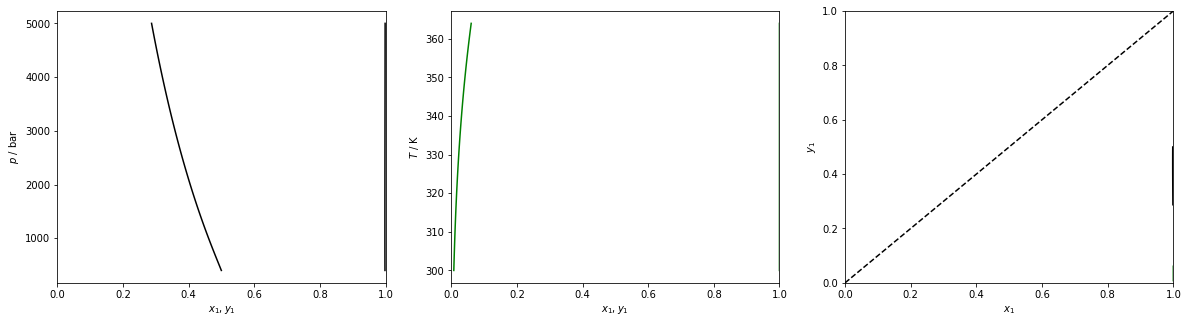

In [5]:
params = PcSaftParameters.from_json(['water_np', 'octane'], '20191105_pure_parameters.json')
saft = PcSaft(params)
dia_p = PhaseDiagramBinary.new_pxy_lle(saft, 500*KELVIN, 0.5, BAR, 5000*BAR)
dia_t = PhaseDiagramBinary.new_txy_lle(saft, BAR, 0.5, 300*KELVIN, 364*KELVIN)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.liquid_molefracs, dia_p.pressure/BAR, '-k')
ax[0].plot(dia_p.vapor_molefracs, dia_p.pressure/BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.liquid_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vapor_molefracs, dia_t.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.liquid_molefracs, dia_t.vapor_molefracs, '-g')
ax[2].plot(dia_p.liquid_molefracs, dia_p.vapor_molefracs, '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

##  Heteroazeotropic mixture

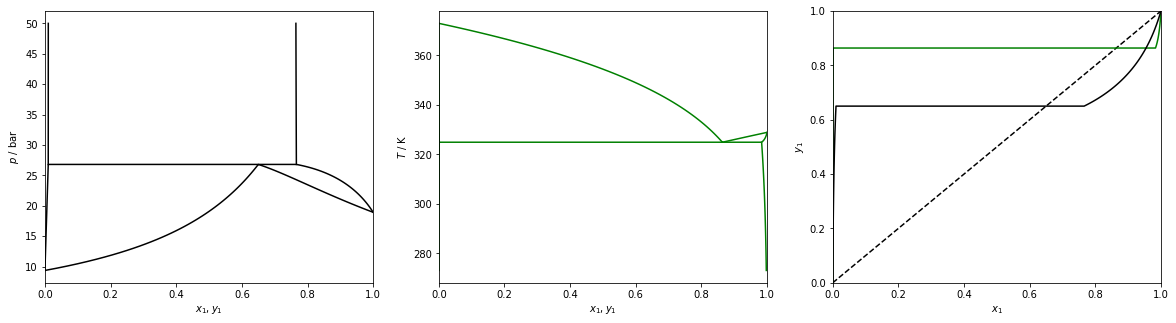

In [6]:
params = PcSaftParameters.from_json(['acetone', 'water_np'], '20191105_pure_parameters.json')
saft = PcSaft(params)
dia_p = PhaseDiagramHetero.new_pxy(saft, 450*KELVIN, (0.005, 0.9), 50*BAR, 101)
dia_t = PhaseDiagramHetero.new_txy(saft, BAR, (0.001, 0.99), 273.15*KELVIN, 101)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.vle.liquid_molefracs, dia_p.vle.pressure/BAR, '-k')
ax[0].plot(dia_p.vle.vapor_molefracs, dia_p.vle.pressure/BAR, '-k')
ax[0].plot(dia_p.lle.vapor_molefracs, dia_p.lle.pressure/BAR, '-k')
ax[0].plot(dia_p.lle.liquid_molefracs, dia_p.lle.pressure/BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.vle.liquid_molefracs, dia_t.vle.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vle.vapor_molefracs, dia_t.vle.temperature/KELVIN, '-g')
ax[1].plot(dia_t.lle.liquid_molefracs, dia_t.lle.temperature/KELVIN, '-g')
ax[1].plot(dia_t.lle.vapor_molefracs, dia_t.lle.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.vle.liquid_molefracs, dia_t.vle.vapor_molefracs, '-g')
ax[2].plot(dia_p.vle.liquid_molefracs, dia_p.vle.vapor_molefracs, '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');

##  Two associating components

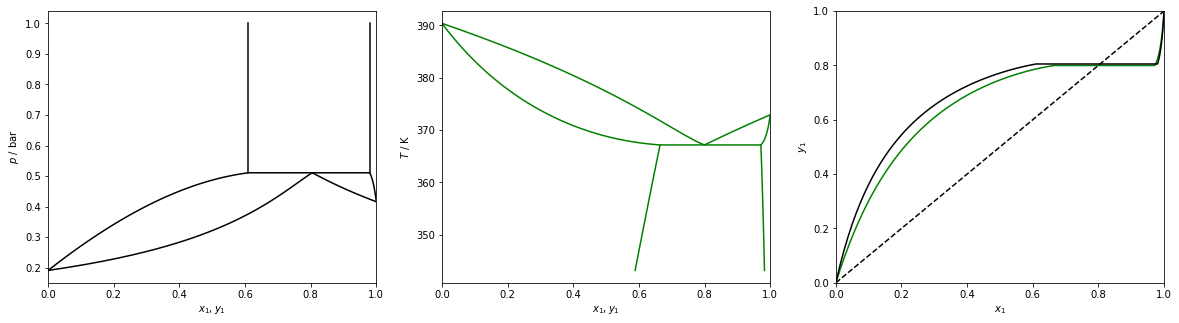

In [7]:
params = PcSaftParameters.from_json(['water_np', '1-butanol_n'], '20191105_pure_parameters.json')
saft = PcSaft(params)
dia_p = PhaseDiagramHetero.new_pxy(saft, 350*KELVIN, (0.55, 0.98), BAR, 101)
dia_t = PhaseDiagramHetero.new_txy(saft, BAR, (0.5,0.995), 343.15*KELVIN, 101)

f, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].plot(dia_p.vle.liquid_molefracs, dia_p.vle.pressure/BAR, '-k')
ax[0].plot(dia_p.vle.vapor_molefracs, dia_p.vle.pressure/BAR, '-k')
ax[0].plot(dia_p.lle.vapor_molefracs, dia_p.lle.pressure/BAR, '-k')
ax[0].plot(dia_p.lle.liquid_molefracs, dia_p.lle.pressure/BAR, '-k')
ax[0].set_xlim(0,1)
ax[0].set_xlabel('$x_1,y_1$')
ax[0].set_ylabel('$p$ / bar')

ax[1].plot(dia_t.vle.liquid_molefracs, dia_t.vle.temperature/KELVIN, '-g')
ax[1].plot(dia_t.vle.vapor_molefracs, dia_t.vle.temperature/KELVIN, '-g')
ax[1].plot(dia_t.lle.liquid_molefracs, dia_t.lle.temperature/KELVIN, '-g')
ax[1].plot(dia_t.lle.vapor_molefracs, dia_t.lle.temperature/KELVIN, '-g')
ax[1].set_xlim(0,1)
ax[1].set_xlabel('$x_1,y_1$')
ax[1].set_ylabel('$T$ / K')

ax[2].plot([0,1], [0,1], '--k')
ax[2].plot(dia_t.vle.liquid_molefracs, dia_t.vle.vapor_molefracs, '-g')
ax[2].plot(dia_p.vle.liquid_molefracs, dia_p.vle.vapor_molefracs, '-k')
ax[2].set_xlim(0,1)
ax[2].set_ylim(0,1)
ax[2].set_xlabel('$x_1$')
ax[2].set_ylabel('$y_1$');